In [1]:
# pip install matplotlib

In [2]:
# pip install seaborn

In [3]:

# import all needed libraries

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,r2_score
from sklearn.metrics import confusion_matrix, classification_report




In [4]:
# read csv file using pandas

df=pd.read_csv('Book.csv')
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014


In [5]:
# no need this because it give value error of continuous value error 
# df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [6]:
l=['Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']
df[df[l]=="NAN"]

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1986,NaN,NaN,NaN,NAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NAN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NAN,NAN,NaN,NaN


In [7]:
# drop the all nan and empty data

for i in l:
    df.drop(df.index[df[i]=="NAN"],inplace=True,axis=0)
    df.drop(df.index[df[i]==" "],inplace=True,axis=0)

In [8]:
# convert all data type into float

for i in l:
    df[i]=df[i].astype('float')

In [9]:
df.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1.577000e+03,1.577000e+03,1577.000000
mean,26.301354,6.338509,68.809670,1812.476303,5.204965,1.397830,3.841859e+05,6.248131e+05,2010.407102
std,3.264131,1.286977,1111.322252,5321.828994,20.486062,2.800052,9.032673e+06,1.545279e+07,2.878751
min,10.000000,0.000000,2.600000,3.700000,0.100000,0.000000,0.000000e+00,4.000000e+00,2003.000000
25%,25.000000,5.900000,6.900000,75.000000,1.100000,0.250000,2.900000e+01,1.410000e+02,2008.000000
50%,27.000000,6.700000,7.200000,170.000000,1.800000,0.510000,2.280000e+02,5.890000e+02,2011.000000
75%,28.300000,7.100000,7.600000,605.000000,3.500000,1.460000,1.000000e+03,2.309000e+03,2013.000000
max,35.000000,10.000000,28598.000000,47156.000000,534.500000,58.100000,2.725216e+08,5.110909e+08,2014.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


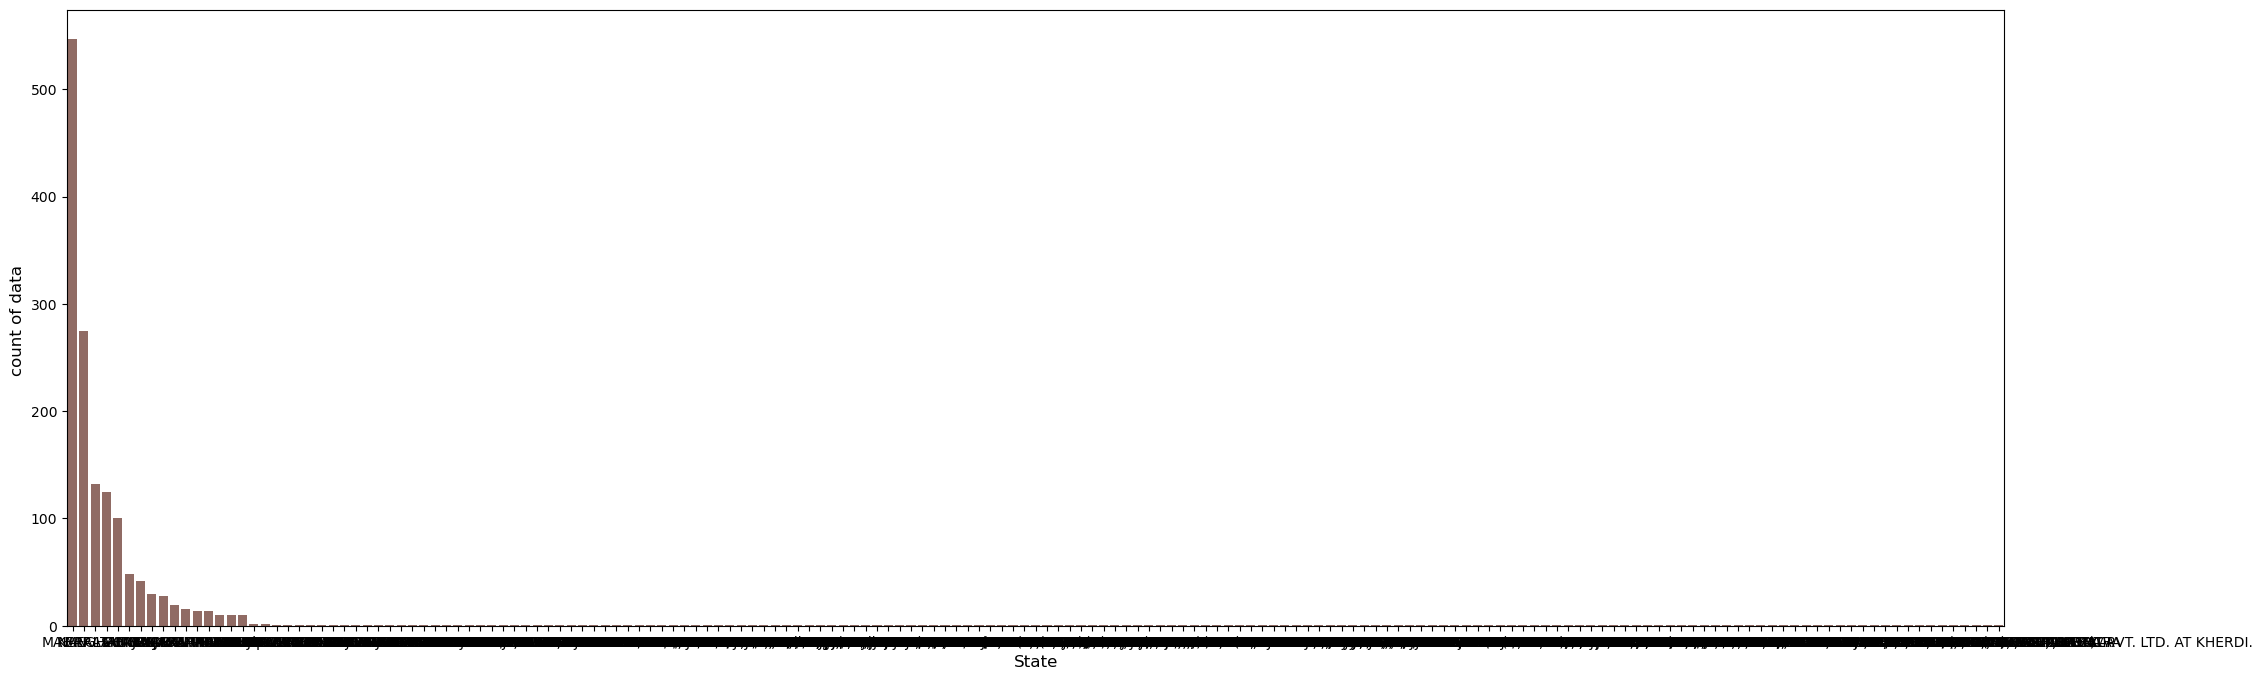

In [10]:
# viewing the column of state 

color=sns.color_palette()

int_level = df['STATE'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[5])
plt.ylabel('count of data ',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


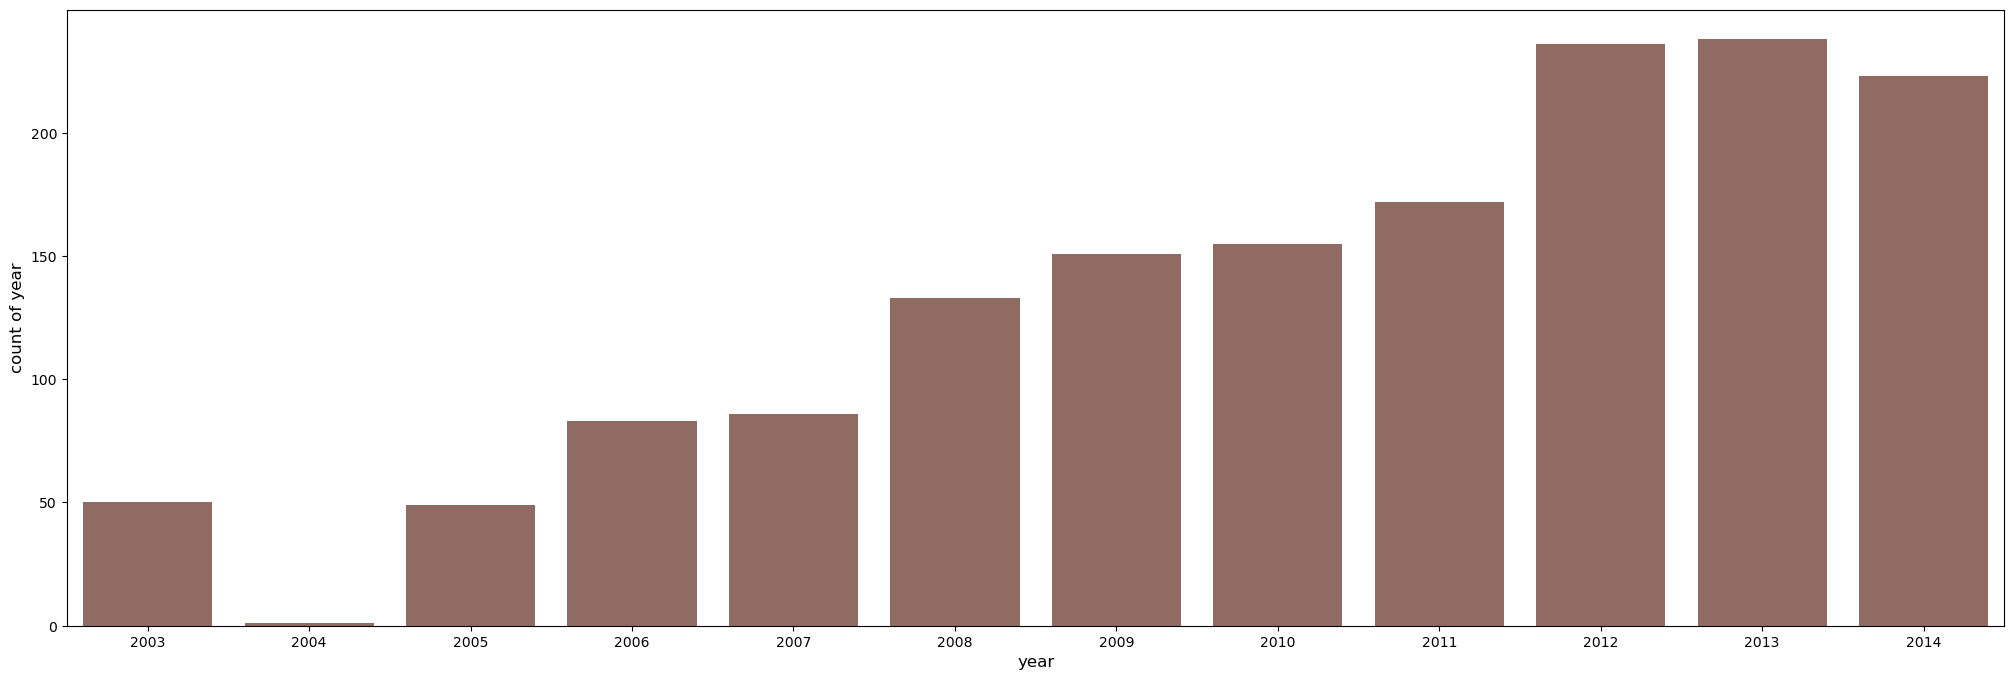

In [11]:
# viewing the column data of year

color=sns.color_palette()

int_level = df['year'].value_counts()

plt.figure(figsize=(25,8))
sns.barplot(int_level.index,int_level.values,alpha=0.9,color=color[5])
plt.ylabel('count of year',fontsize=12)
plt.xlabel('year',fontsize=12)
plt.show()

Text(0.5, 1.0, 'Travil')

<Figure size 2000x2000 with 0 Axes>

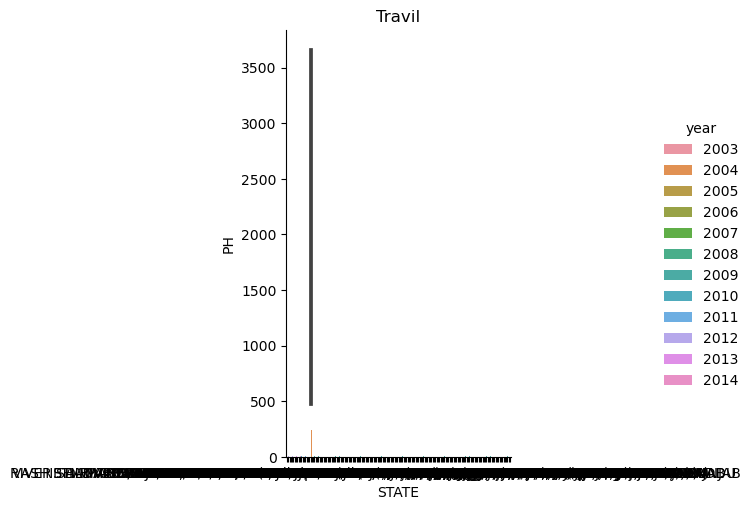

In [12]:
# State and year comparision with ph rate

plt.figure(figsize=(20,20))
g=sns.catplot(data=df,kind="bar",x="STATE",y="PH",hue="year")
plt.title("Travil")

<AxesSubplot:ylabel='year'>

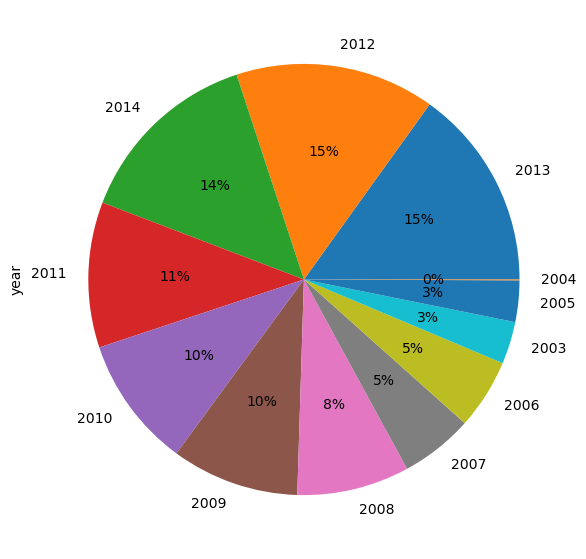

In [13]:
df['year'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.0f%%')

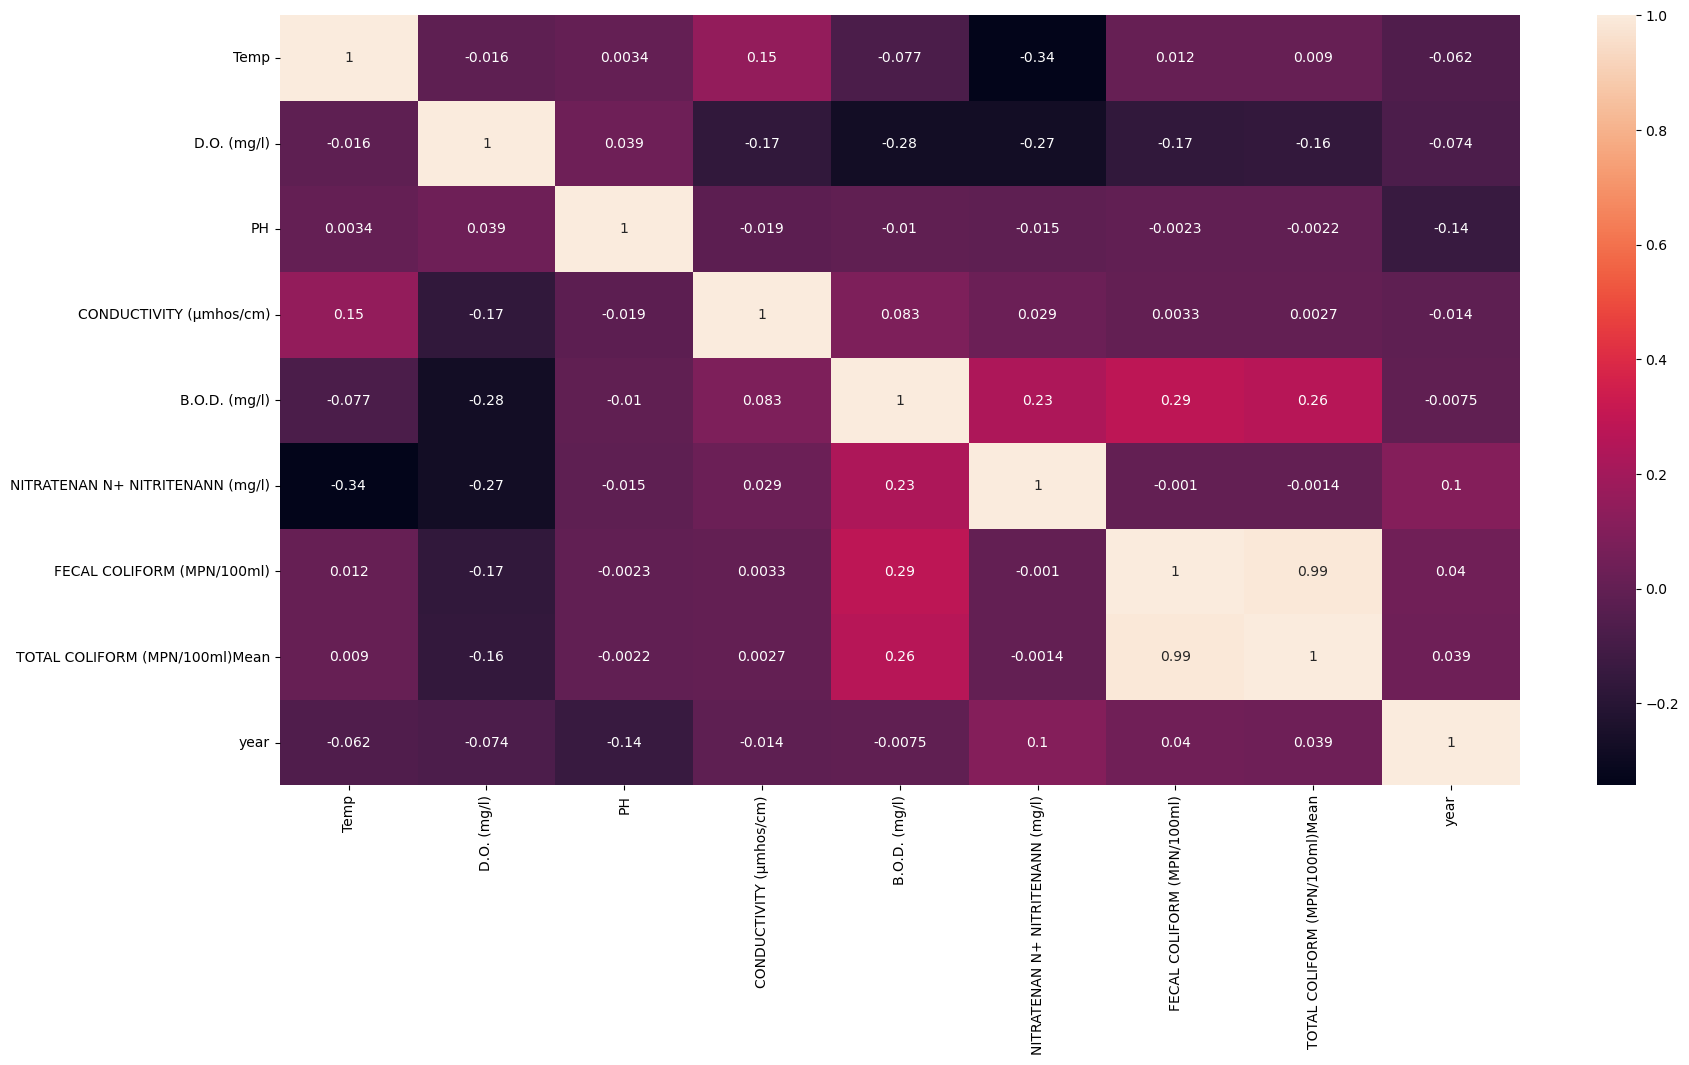

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
# Create column for the pure water range and split with undrikingable water

df['PH Range']=pd.cut(x=df['PH'],bins=[0,6.49,7.5,14],labels=['0-6.49','6.5-7.5','7.5-14'])
df['Water Qu']=df['PH Range'].map({'6.5-7.5':1,'7.5-14':0,'0-6.49':0})

df.drop(df.index[df['PH Range']=="NaN"],inplace=True,axis=0)


In [16]:
df.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year,Water Qu
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1.577000e+03,1.577000e+03,1577.000000,1526.000000
mean,26.301354,6.338509,68.809670,1812.476303,5.204965,1.397830,3.841859e+05,6.248131e+05,2010.407102,0.659895
std,3.264131,1.286977,1111.322252,5321.828994,20.486062,2.800052,9.032673e+06,1.545279e+07,2.878751,0.473899
min,10.000000,0.000000,2.600000,3.700000,0.100000,0.000000,0.000000e+00,4.000000e+00,2003.000000,0.000000
25%,25.000000,5.900000,6.900000,75.000000,1.100000,0.250000,2.900000e+01,1.410000e+02,2008.000000,0.000000
50%,27.000000,6.700000,7.200000,170.000000,1.800000,0.510000,2.280000e+02,5.890000e+02,2011.000000,1.000000
75%,28.300000,7.100000,7.600000,605.000000,3.500000,1.460000,1.000000e+03,2.309000e+03,2013.000000,1.000000
max,35.000000,10.000000,28598.000000,47156.000000,534.500000,58.100000,2.725216e+08,5.110909e+08,2014.000000,1.000000


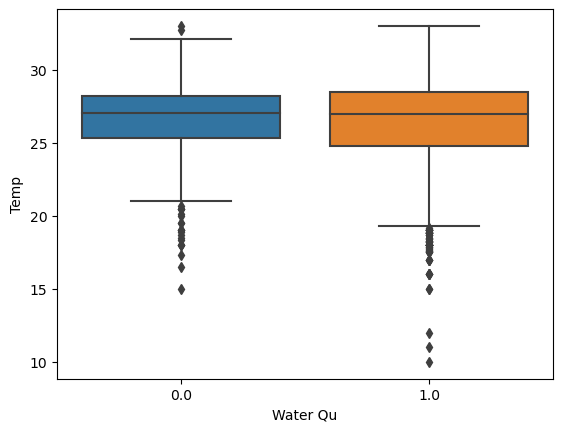

count    1574.000000
mean       26.285728
std         3.247477
min        10.000000
25%        25.000000
50%        27.000000
75%        28.300000
max        33.000000
Name: Temp, dtype: float64





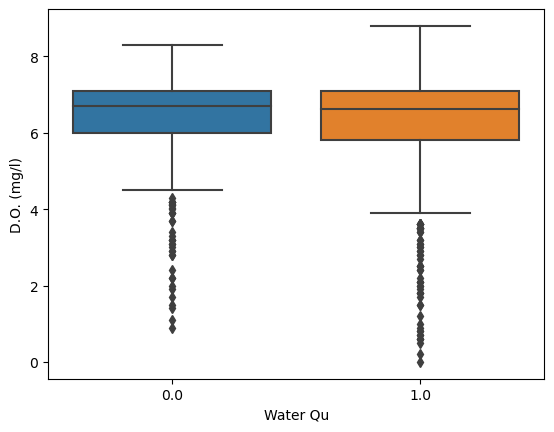

count    1570.000000
mean        6.332821
std         1.276125
min         0.000000
25%         5.900000
50%         6.700000
75%         7.100000
max         8.800000
Name: D.O. (mg/l), dtype: float64





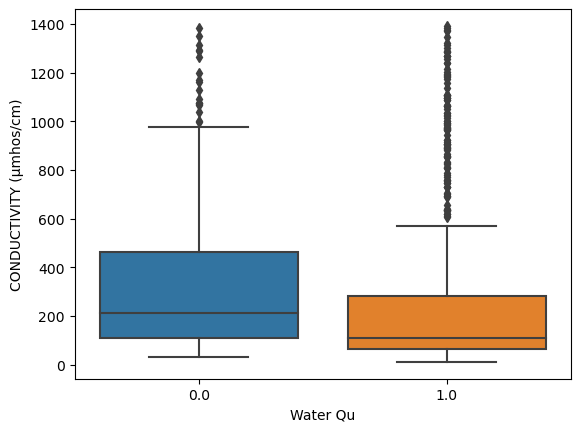

count    1360.000000
mean      262.216125
std       300.650740
min         3.700000
25%        68.000000
50%       129.000000
75%       316.000000
max      1392.000000
Name: CONDUCTIVITY (µmhos/cm), dtype: float64





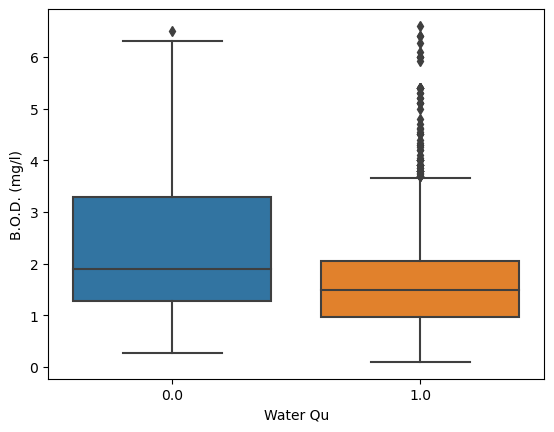

count    1200.000000
mean        1.928923
std         1.260142
min         0.100000
25%         1.000000
50%         1.600000
75%         2.400000
max         6.600000
Name: B.O.D. (mg/l), dtype: float64





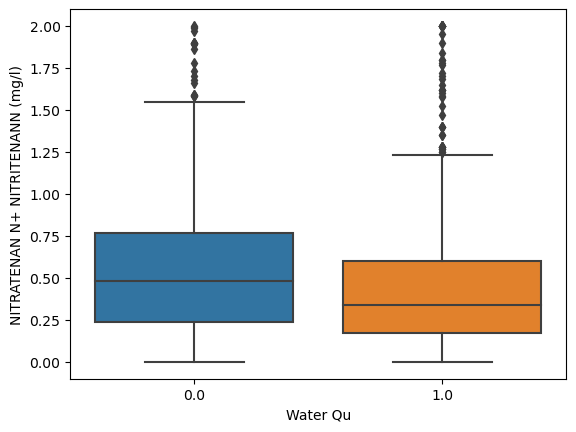

count    1051.000000
mean        0.495952
std         0.419315
min         0.000000
25%         0.200000
50%         0.400000
75%         0.652500
max         2.000000
Name: NITRATENAN N+ NITRITENANN (mg/l), dtype: float64





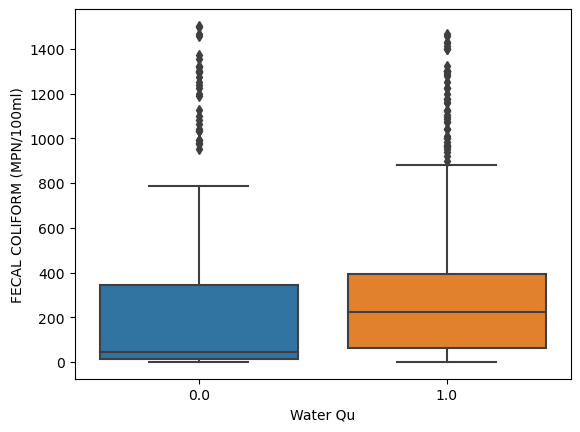

count     909.000000
mean      267.710273
std       341.424936
min         0.000000
25%        18.000000
50%       142.000000
75%       358.000000
max      1503.000000
Name: FECAL COLIFORM (MPN/100ml), dtype: float64


In [17]:
# Box plot for comparing the ph with other column and finding the outliers


col_pruning=['Temp','D.O. (mg/l)','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)']

for col in col_pruning:
    print("\n\n")
    coldesc=df[col].describe()
    col_IQR=coldesc[6]-coldesc[4]
    col_Lower=coldesc[4]-(1.5*col_IQR)

    col_Higher=coldesc[6]+(1.5*col_IQR)

#     print(col_Lower,col_Higher)
#     df.drop(df.index[(df[col]<col_Lower) + (df[col]>col_Higher)],inplace=True,axis=0)
    df.drop(df.index[(df[col]>col_Higher)],inplace=True,axis=0)
    sns.boxplot(x='Water Qu',y=df[col],data=df)
    plt.show()
    
    
    print(df[col].describe())

In [18]:
df.drop(['year'],inplace=True,axis=1)

In [19]:
df.drop(['STATION CODE','LOCATIONS','STATE','PH Range','Water Qu'],inplace=True,axis=1)

In [20]:
# transforming your data so that it fits within a specific scale

mm=MinMaxScaler()
df[l]=mm.fit_transform(df[l])
df.describe()

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.668897,0.731552,0.003845,0.134526,0.279528,0.243960,0.178117,0.034113
std,0.124451,0.118140,0.051129,0.163506,0.198256,0.204683,0.227162,0.060747
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.611111,0.707317,0.000147,0.042714,0.137031,0.100000,0.011976,0.005208
50%,0.689833,0.756098,0.000161,0.074408,0.218750,0.195000,0.094478,0.017454
75%,0.744444,0.792683,0.000175,0.155802,0.375000,0.315000,0.238190,0.040116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


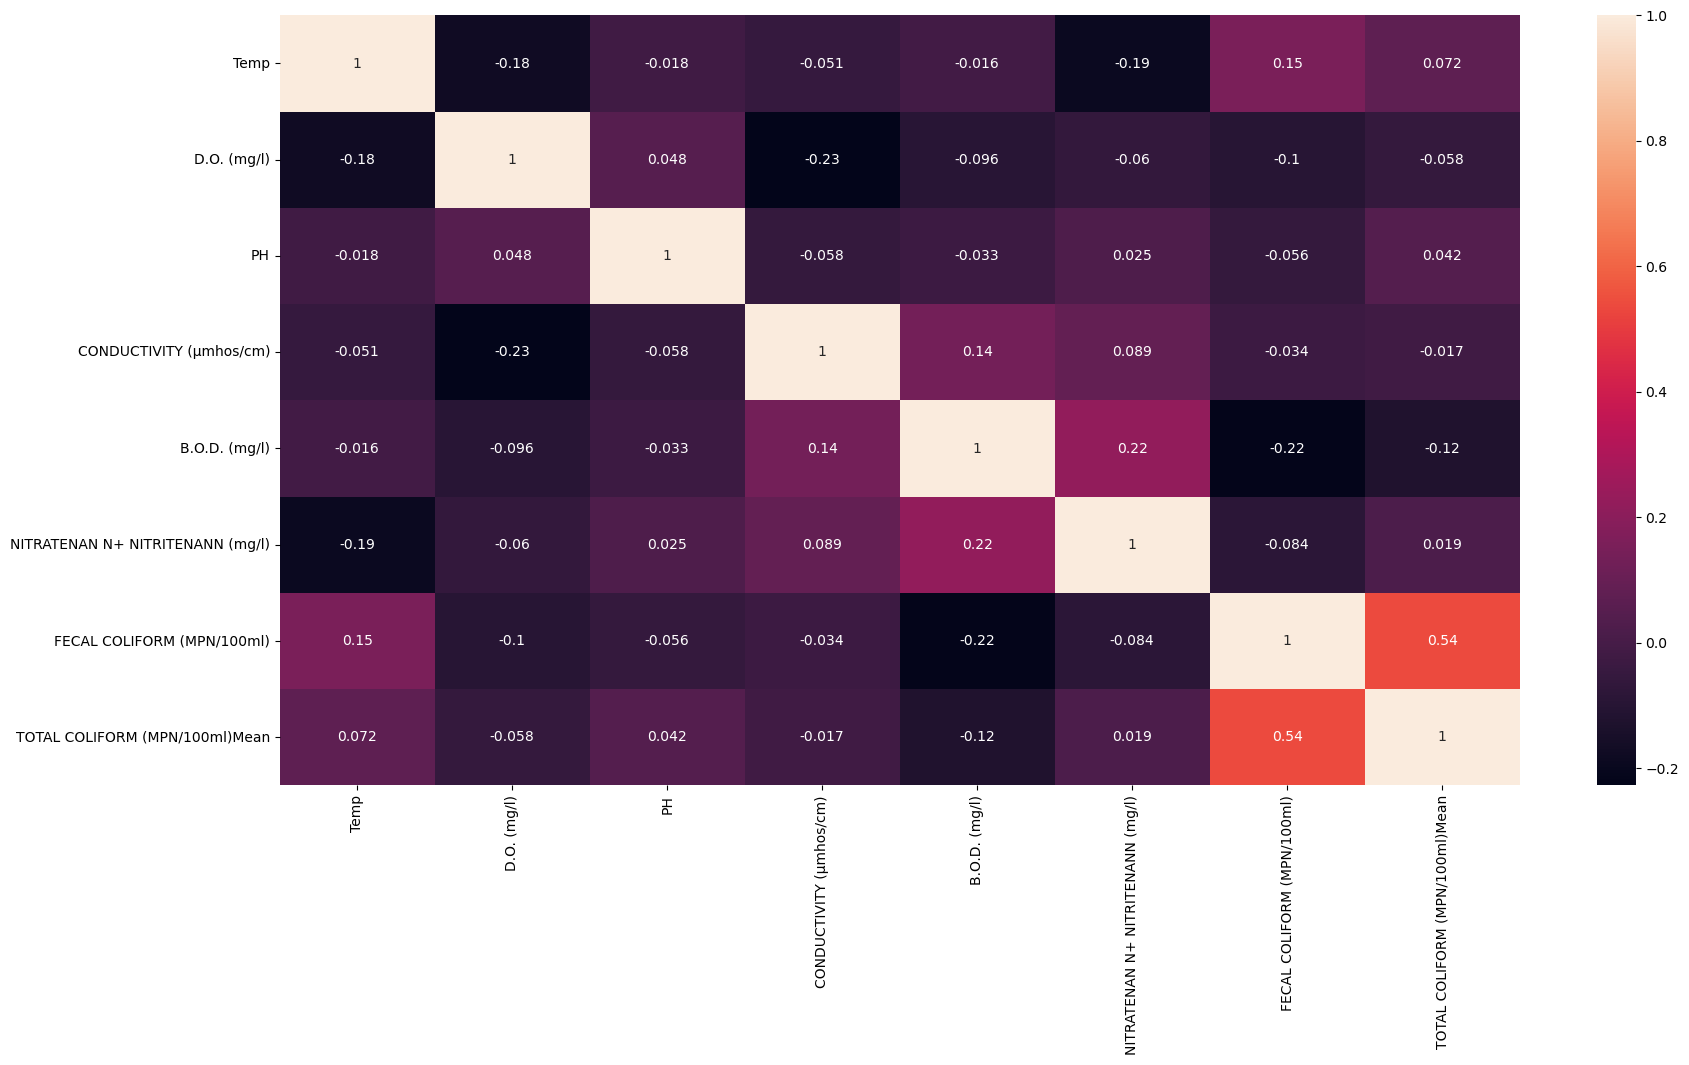

In [21]:
# Heat map for finding the corrlation between columns 

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
df

,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
15,0.777778,0.817073,0.000154,0.175250,0.218750,0.1000,0.728543,0.099638
16,0.783333,0.817073,0.000154,0.132752,0.140625,0.0500,0.855622,0.123846
27,0.838889,0.719512,0.000171,0.296262,0.296875,0.0500,0.574850,0.062411
29,0.561111,0.731707,0.000182,0.065764,0.750000,0.1000,0.010645,0.001302
30,0.811111,0.768293,0.000185,0.068645,0.765625,0.2000,0.009980,0.001221
...,...,...,...,...,...,...,...,...
1981,0.888889,0.817073,0.006134,0.002161,0.218750,0.0690,0.000092,0.007567
1982,0.777778,0.792683,0.007393,0.002233,0.343750,0.2925,0.000389,0.014077
1984,0.722222,0.768293,0.005015,0.002449,0.296875,0.2530,0.000337,0.001383
1985,0.722222,0.780488,0.004665,0.002737,0.203125,0.3045,0.000405,0.008178


In [23]:
l=['Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']
split=l.copy()
y=df['PH']
split.remove('PH')
x=df[split]

### Split the Data

In [24]:
#  train and test date spliting 

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42) 
 

In [25]:
x_train

,Temp,D.O. (mg/l),CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean
1196,0.361111,0.902439,0.287618,0.109375,0.050,0.007984,0.000854
216,0.255556,0.865854,0.033350,0.234375,1.000,0.012641,0.001302
428,0.627778,0.658537,0.119066,0.593750,1.000,0.014637,0.003255
1475,0.666667,0.353659,0.072967,0.093750,0.075,0.176314,0.032385
1067,0.850000,0.768293,0.059281,0.546875,0.200,0.210246,0.023516
...,...,...,...,...,...,...,...
244,0.644444,0.731707,0.148599,0.640625,0.950,0.339321,0.023109
580,0.611111,0.792683,0.045595,0.140625,0.170,0.113107,0.021726
1906,0.722222,0.780488,0.002953,0.718750,0.050,0.000067,0.005737
906,0.622222,0.756098,0.031910,0.062500,0.220,0.815037,0.082225


In [26]:
# print(list(x_train.iloc[1]))

## LinearRegression

In [27]:
# fit the Linear regression model 

regressor= LinearRegression()  
regressor.fit(x_train, y_train)
y_pred= regressor.predict(x_test)  
# x_pred= regressor.predict(x_train)

In [28]:
ypred_pd=pd.DataFrame({'WQ':y_test.values,'WQ_Pred':y_pred})
ypred_pd['predicted']=ypred_pd['WQ_Pred'].map(lambda x:1 if x>0.5 else 0)
ypred_pd['WQ']=ypred_pd['WQ'].map(lambda x:1 if x>0.5 else 0)
ypred_pd.head()

,WQ,WQ_Pred,predicted
0,0,0.012644,0
1,0,0.007889,0
2,0,0.003795,0
3,0,0.011636,0
4,0,0.001840,0


In [29]:
confusion=confusion_matrix(ypred_pd['WQ'],ypred_pd['predicted'])
print(confusion)

[[227   0]
 [  1   0]]


In [30]:
print(accuracy_score(ypred_pd['WQ'],ypred_pd['predicted']))

0.9956140350877193


# Decision Tree

In [31]:
# Fit the desiontree regression

clf_gini = DecisionTreeRegressor(random_state = 0)

clf_gini.fit(x_train, y_train)

y_pred = clf_gini.predict(x_test)


In [32]:
ypred_pd=pd.DataFrame({'WQ':y_test.values,'WQ_Pred':y_pred})
ypred_pd['predicted']=ypred_pd['WQ_Pred'].map(lambda x:1 if x>0.7 else 0)
ypred_pd['WQ']=ypred_pd['WQ'].map(lambda x:1 if x>0.5 else 0)
ypred_pd.head()

,WQ,WQ_Pred,predicted
0,0,0.001273,0
1,0,0.000161,0
2,0,0.000154,0
3,0,0.000192,0
4,0,0.000161,0


In [33]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(ypred_pd['WQ'],ypred_pd['predicted'])))

Model accuracy score with criterion gini index: 0.9956


# Random Forest 

In [34]:
# Fit the random forest regression

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)
melb_preds = forest_model.predict(x_test)

# print(mean_absolute_error(val_y, melb_preds))

In [35]:
ypred_pd=pd.DataFrame({'WQ':y_test.values,'WQ_Pred':y_pred})
ypred_pd['predicted']=ypred_pd['WQ_Pred'].map(lambda x:1 if x>0.7 else 0)
ypred_pd['WQ']=ypred_pd['WQ'].map(lambda x:1 if x>0.5 else 0)
ypred_pd.head()

,WQ,WQ_Pred,predicted
0,0,0.001273,0
1,0,0.000161,0
2,0,0.000154,0
3,0,0.000192,0
4,0,0.000161,0


In [36]:
print(accuracy_score(ypred_pd['WQ'],ypred_pd['predicted']))


0.9956140350877193


# Random Forest regression has the highest accuracy score = 0.99561

In [37]:
from joblib import dump

In [39]:
dump(forest_model,'C:/Users/ThamotharanC/OneDrive - Softcrylic LLC/Desktop/Django Env/project/wqa/wapp/notebook/model.joblib')

['C:/Users/ThamotharanC/OneDrive - Softcrylic LLC/Desktop/Django Env/project/wqa/wapp/notebook/model.joblib']